# Esercizio 2.2 - Random Walk 3D

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import scipy.stats
import os
import subprocess
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.mplot3d import Axes3D

arguments = ""
subprocess.run("make clean", shell=True, stdout=subprocess.PIPE)
subprocess.run('make esegui ARGS="%s"' % arguments, shell=True)

CompletedProcess(args='make esegui ARGS=""', returncode=0)

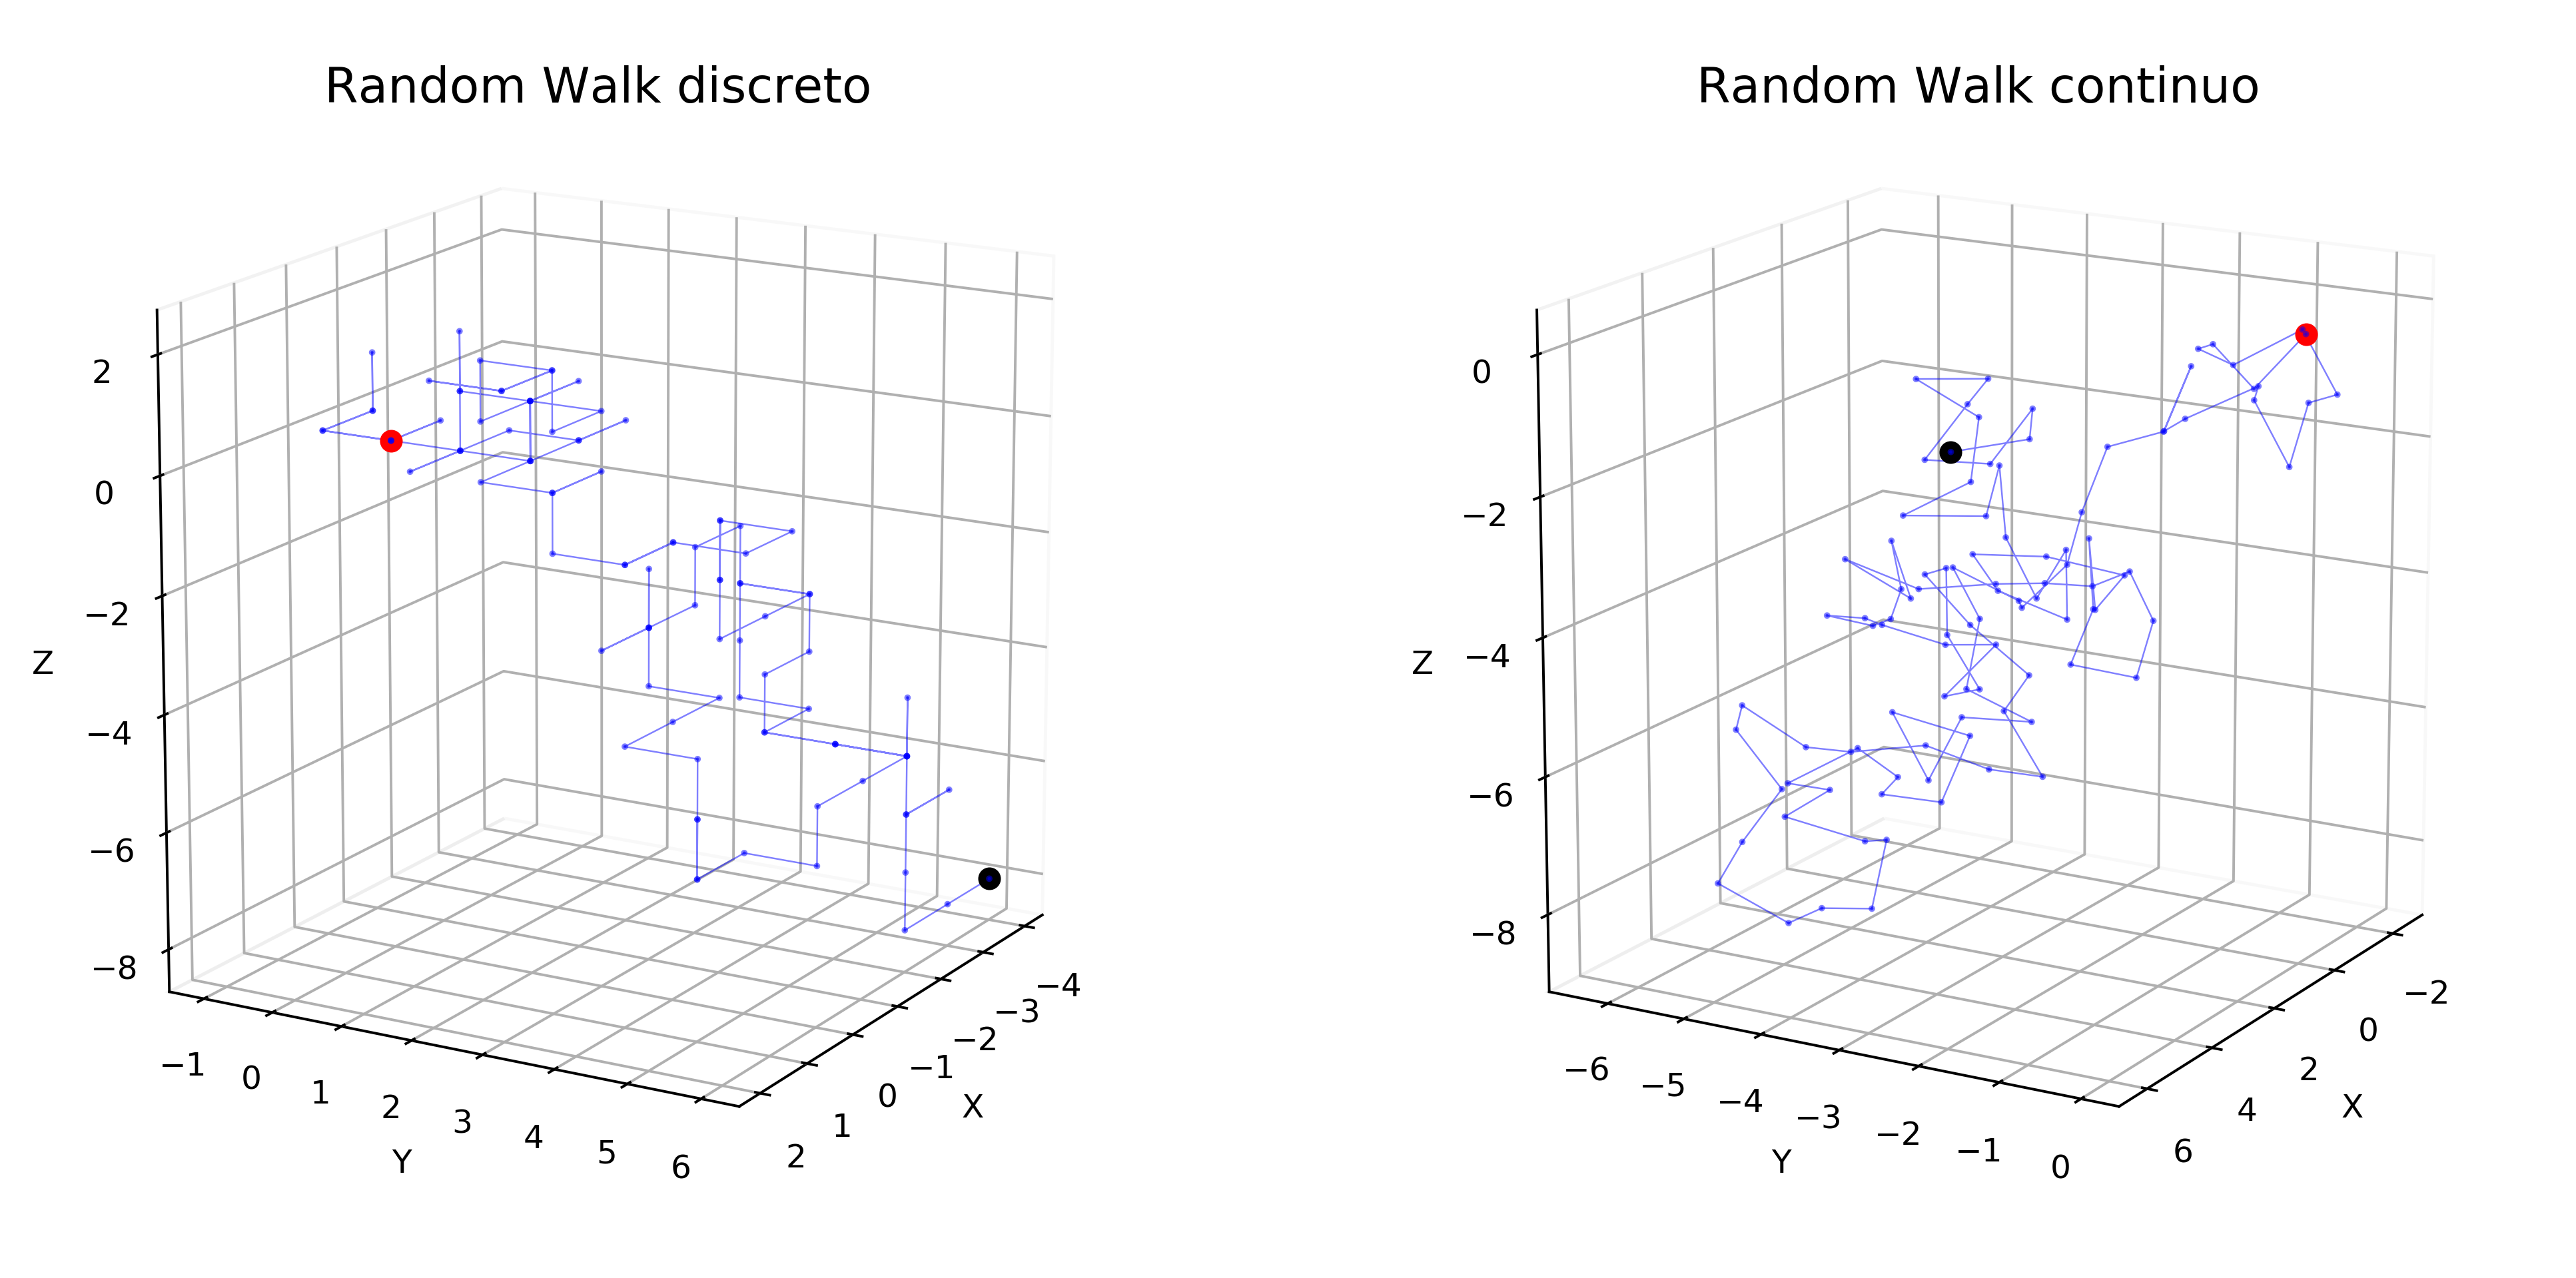

In [2]:
# Caricamento dati da file
x, y, z = (np.genfromtxt('rw3dD.txt', usecols=i, autostrip=True) for i in range(3))
xc, yc, zc = (np.genfromtxt('rw3dC.txt', usecols=i, autostrip=True) for i in range(3))
coord = [[x,y,z],[xc,yc,zc]]

# Grafico RW
fig = plt.figure(figsize=(14,7), dpi=350)
names = ["discreto","continuo"]

for j in range(2):
    ax = fig.add_subplot(1, 2, j+1, projection='3d')
    ax.view_init(15, 30)
    ax.grid(True)
    ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter3D(coord[j][0], coord[j][1], coord[j][2], c='blue', alpha=0.5,s=1)
    ax.plot3D(coord[j][0], coord[j][1], coord[j][2], c='blue', alpha=0.5, lw=0.5)
    ax.plot3D(coord[j][0][:1], coord[j][1][:1], coord[j][2][:1], c='red', marker='o')          # Partenza
    ax.plot3D(coord[j][0][-1:], coord[j][1][-1:], coord[j][2][-1:], c='black', marker='o')     # Arrivo
    ax.set_title('Random Walk %s' % names[j], fontsize=15)

#fig.tight_layout()
plt.show()

## Confronto fra RW discreto e continuo

Vengono confrontati:
1) un Random Walk tridimensionale su un reticolo cubico con passo pari ad $a = 1$;
2) un random walk continuo nello spazio.

Il numero di passi è fissato a 100; in entrambi i casi tutti i random walks simulati partono dall'origine. Il numero di simulazioni è pari a $10^5$ per ciascun caso.

Il valore $\sqrt{\langle r^2_i\rangle_{RW}}$, con $i$ passo i-esimo del RW, rappresenta la media della distanza dall'origine raggiunta, effettuata su i diversi cammini. La media e la deviazione standard vengono calcolate tramite il blocking method per ogni passo.
Calcolata $\langle r^2_i\rangle_{RW}$, per ottenere la deviazione standard della radice si deve ricorrere alla propagazione dell'errore:
$$\frac{\partial \sqrt{\langle r^2_i\rangle_{RW}}}{\partial \langle r^2_i\rangle_{RW}}*\frac{\sigma_i}{\sqrt{ N_{blk}}} = \frac{\sigma_i\,/\,\sqrt{N_{blk}}}{2\sqrt{\langle r^2_i\rangle_{RW}}} $$

con $N_{blk}$ = numero di blocchi.

Per il primo caso i passi casuali avevano lunghezza $a = 1$ e la scelta della direzione in cui muoversi è casuale; nel secondo caso la direzione e il verso del passo sono stati campionati generando un angolo solido casuale. Le coordinate del camminatore all'i-esimo passo sono quindi:
\begin{cases}
  x_i &= x_{i-1} + a \sin\theta\cos\phi \\
  y_i &= y_{i-1} + a \sin\theta\sin\phi \\
  z_i &= z_{i-1} + a \cos\theta 
\end{cases}

[0.99148162 0.5030279 ]


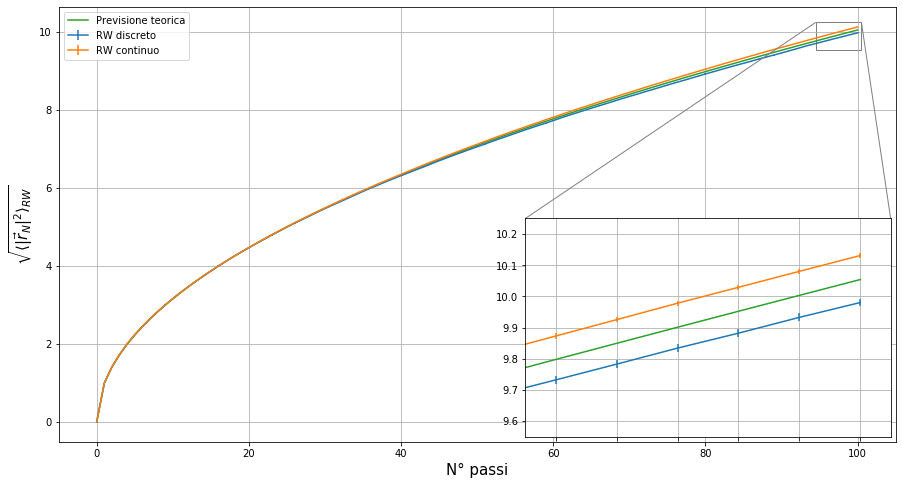

In [3]:
N = 101
x = np.arange(N)

# Caricamento dati da file
c, errc = (np.genfromtxt('rw3dpC.txt', usecols=i, autostrip=True) for i in range(2))
d, errd = (np.genfromtxt('rw3dpD.txt', usecols=i, autostrip=True) for i in range(2))
c = np.sqrt(c)
d = np.sqrt(d)
errc[1:] = errc[1:]/(2*c[1:])
errd[1:] = errd[1:]/(2*d[1:])

# Funzione teorica
def test_func(x, a, b):
    return a * x**(b)

params, params_covariance = scipy.optimize.curve_fit(test_func, x, (c+d)/2, p0=[0.92, 0.5])
print(params)
fig, ax = plt.subplots(figsize=[15,8])
plt.xlabel('N° passi', fontsize = 15)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}}$', fontsize = 15)

# Zoom del grafico
x1, x2, y1, y2 = 94.5, 100.5, 9.55, 10.25
axins = zoomed_inset_axes(ax, 8, loc=4)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")
plt.errorbar(x,d,yerr=errd,label='RW discreto')
plt.errorbar(x,c,yerr=errc,label='RW continuo')
plt.plot(x, test_func(x, params[0], params[1]),label='Previsione teorica')
plt.grid(True)
ax.errorbar(x,d,yerr=errd,label='RW discreto')
ax.errorbar(x,c,yerr=errc,label='RW continuo')
ax.plot(x, test_func(x, params[0], params[1]),label='Previsione teorica')
ax.legend(loc=2)
ax.grid(True)
plt.show()

Il risultato segue una distribuzione del tipo $f(N) \sim \sqrt{N}$, con $N$ numero di step. Mediando i risultati su $10^5$ random walk simulati, i due approcci discreto e continuo danno praticamente lo stesso risultato. Il comportamento rispecchia un processo diffusivo con $\langle x^2(t) \rangle \simeq 2\,D\,t \simeq N a^2$.

In questo caso $\sqrt{\langle x^2(t) \rangle}$ corrisponde a $\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}} \simeq \sqrt{N a^2}\,\,$; &nbsp;con $a = 1$ si ha $\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}} \simeq \sqrt{N} \simeq 10$.

I parametri ottenuti dal fit sono 0.99148162 e 0.5030279; la distanza media dall'origine segue quindi un andamento che va come $\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}} \simeq 0.99*N^{0.503}$ in accordo con le previsioni teoriche di comportamento diffusivo.